# It's a Small World (Problem 5)

#### Author: Batuhan Ozcomlekci, 21703297

**One of the early key papers that launched network science is the one by Watts and Strogatz, titled ["Collective dynamics of ’small-world’ networks"](http://snap.stanford.edu/class/cs224w-readings/watts98smallworld.pdf) Nature, 1998. This article demonstrates that many biological, technological and social networks consist of a connection topology which is not either completely random or completely regular. In the intermediary region between randomness and regularness, peculiar types of networks are present and they are called small-world networks. Some of the examples to these networks are the power grid of the western United States, the neural network of the worm Caenorhabditis elegans and the collaboration graph of film actors. In this article, regular networks are reorganized via a rewiring procedure to obtain the described small-world networks.**

**Small-world networks have peculiar properties regarding propagation speed. To show that, an example of infectious diseases propagating through the network is covered in the article. According to this theory, infectious diseases spread more easily in small-world networks than in regular lattices.**

**Throughout this report, the theory behind small-world networks will be explained by defining appropriate parameters of a graph. Then utilizing computer-generated networks as described in the paper, the figures in the paper will be reproduced.** 

### Theory

Initially, we need to start with the definition of the appropriate parameters of our ring-shaped graph. These are:

- *$N$*: Number of vertices in the graph

- *$k$*: Number of edges for each vertex (even to make initial regular connections symmetric)

- *$p$*: Probability to rewire the graph edges in the rewiring process.


Once the parameters are defined, construction of the graph is performed according to the following procedure:

1. Start with a circularly aligned N vertices.

2. Connect each vertex to its k nearest neighbor (even k). Do not allow duplicate edges.

3. Select a vertex and the edge to its ith nearest clockwise neighbour vertex (initially, first nearest neighbour). Rewire this edge to a random vertex with probability p. Do not allow duplicate edges.

4. Iterate over all of the vertices in clockwise direction to apply the rewiring procedure.

5. Once one lap is completed, proceed with the (i+1)th nearest neighbours. Apply the same procedure for the next lap.

6. The procedure should be applied for k/2 laps to complete the rewiring and thus, the construction of the intended graph.

The graph will be available for an analysis when these steps are completed.


The graph topology can be in 3 different ways:

+ *Fully regular when p=0:* Basically, rewiring procedure is skipped.

+ *Intermediary networks 0<p<1:* The graph becomes increasingly disordered p. For some values of p in this region, small-world phenomenon is observed.

+ *Fully random when p=1:* Each edge is connected randomly yielding a random network.

To collect information on the topology of the graph, two informative metrics are defined:

+ **Characteristic Path Length, L(p)**: Average of the shortest distance between any two vertices on the graph. This property provide information concerning the global topology of the graph.

+ **Clustering Coefficient, C(p)**: Average of the proportions of connections among the neighbours of a graph to maximum number of connections among these neighbours ($\frac{k(k-1)}{2}$). This property provide information concerning the local cliqueness of the graph.

For example, in a friendship network, L is the average number of friendships in the shortest chain connecting two people and C measures the cliquishness of a friendship circle.

Given these measures, a fully regular (p=0) and a fully random (p=1) networks display the certain trends for these metrics.

+ **For a fully regular (p=0) network,** $L \sim  \frac{n}{2k}$ and $C \sim \frac{3}{4}$

+ **For a fully random (p=1) network,** $L_{random} \sim \frac{ln(n)}{ln(k)}$ and $C_{random} \sim \frac{k}{n}$

In [ ]:
#Run the code below to install the required packages if not already installed
%pip install matplotlib
%pip install ipywidgets
%pip install networkx
%pip install smallworld
%pip install numpy==1.24

In [1]:
# Import the required packages
import networkx as nx
import random
from random import choice
import numpy as np
import math
import itertools
from collections import deque  
from smallworld.draw import draw_network

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
def diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

def get_graph(N, k, p):
    G = nx.Graph()
    all_nodes = list(range(N))
    G.add_nodes_from(range(N))
    half_k = int(k/2)

    adj_mat = np.identity(N)
    for k_nn in range(1, half_k+1):
        for n in range(N):
            target = (n+k_nn)%N
            adj_mat.itemset((n, target), 1)
            adj_mat.itemset((target, n), 1)
    edgelist = []
    for k_nn in range(1, half_k+1):
        for n in range(N):
            if random.random() < p: #rewire
                old = (n+k_nn)%N
                adj_mat.itemset((n, old), 0)
                adj_mat.itemset((old, n), 0)
                nth_row = adj_mat[n].copy()
                forbiddens = list(np.where(nth_row == 1)[0])
                target = choice(diff(all_nodes, forbiddens))
            else:
                target = (n+k_nn)%N
            edgelist.append((n, target))
            adj_mat.itemset((n, target), 1)
            adj_mat.itemset((target, n), 1)

    G.add_edges_from(edgelist)
    return G, adj_mat

In order to draw the network in the figure 1, networkx package similar to [[2]](https://github.com/benmaier/smallworld) is utilized. Below you can play with the visualization.

In [3]:
p = 0.0 # default p
N = 21 # default number of nodes
k = 4 # default number of edges per node

slider_p = widgets.FloatSlider(value=p,
    min=0,
    max=1.0,
    step=0.1,
    description='p',
    orientation='horizontal',
)

slider_N = widgets.IntSlider(value=N,
    min=10,
    max=100,
    step=1,
    description='N',
    orientation='horizontal',
)

slider_k = widgets.IntSlider(value=k,
    min=2,
    max=30,
    step=2,
    description='k',
    orientation='horizontal',
)
output = widgets.Output()
with output:
    output.clear_output()
    label = f'$p={p}$'
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    G, adj_mat = get_graph(N, k, p)
    draw_network(G,k/2,focal_node=0,ax=ax)
    ax.set_title(label,fontsize=11)
    # display the graph
    plt.subplots_adjust(wspace=1)
    plt.show()

def draw_graph(p, N, k):
    with output:
        output.clear_output()
        label = f'$p={p}$'
        fig, ax = plt.subplots(1,1,figsize=(5,5))
        G, adj_mat = get_graph(N, k, p)
        draw_network(G,k/2,focal_node=0,ax=ax)
        ax.set_title(label,fontsize=11)
        # display the graph
        plt.subplots_adjust(wspace=1)
        plt.show()

ie = widgets.interactive(draw_graph, p=slider_p, N=slider_N, k=slider_k)
display(slider_p, slider_N, slider_k, output)


FloatSlider(value=0.0, description='p', max=1.0)

IntSlider(value=21, description='N', min=10)

IntSlider(value=4, description='k', max=30, min=2, step=2)

Output()

### Define algorithms to obtain L(p) and C(p) metrics.

In [4]:
# Return average of the clustering coefficients (C(p))
def avg_coefficient(adj_mat, G):
    C_v_list = []
    for v in range(adj_mat.shape[0]):
        C_v = clustering_coeff(v, adj_mat, G)
        C_v_list.append(C_v)
    return sum(C_v_list) / len(C_v_list)

# Return the clustering coefficient of a vertex (C_v(p))       
def clustering_coeff(v, adj_mat, G):
    vth_row = adj_mat[v]
    nbhood_v = list(np.where(vth_row == 1)[0])
    if len(nbhood_v) < 2:
        return 0
    
    nbhood_connections = 0
    for a, b in itertools.combinations(nbhood_v, 2):
        if adj_mat[a,b]:
            nbhood_connections += 1 
    
    nbhood_size = len(nbhood_v)
    max_connections = (nbhood_size * (nbhood_size-1))/2
    return nbhood_connections / max_connections
                
# Return average of the shortest path (chain) lengths (L(p))
def averageChainLength(adj_mat, G):
    '''returns number of edges in shortest paths between two edges,
        averaged over all pairs of edges''' 
    totDistsCnt = 0
    totDistsSum = 0
    
    for v in range(adj_mat.shape[0]):
        distsCnt, distsSum = shortestPath(v, adj_mat, G)
        totDistsCnt += distsCnt
        totDistsSum += distsSum 
                
    return totDistsSum / totDistsCnt    
        
#Utilize Dikjsta''s shortest path length algorithm         
def shortestPath(V_node, adj_mat, G):
    distances = {}

    q = deque()
    q.append(V_node)
    distances[V_node] = 0
    
    while len(q):
        curr_vertex = q.popleft()
        d = distances[curr_vertex]+1 if curr_vertex in distances else 1 
        
        vth_row = adj_mat[curr_vertex]
        nbhood_v = list(np.where(vth_row == 1)[0])
        connected = [v for v in nbhood_v if v not in distances and v not in q]
        q.extend(connected)
        for c in connected: 
            if c not in distances:
                distances[c] = d
    
    chains = 0
    totalChainLength = 0
    for d in distances.values(): 
        if d != math.inf and d != 0:
            chains += 1
            totalChainLength += d
    
    return chains, totalChainLength 

### Figure 2 (Trends of L(p) and C(p) and the Small-World Phenomenon in the Intermediary Region)

In [5]:
# Reproduce the graph in Figure 2 of the paper
C_list = []
L_list = []
p_list = []

G_0, adj_mat_0 = get_graph(N=1000, k=10, p=0)
C_0 = avg_coefficient(G=G_0, adj_mat=adj_mat_0)
L_0 = averageChainLength(G=G_0, adj_mat=adj_mat_0)
    
for i, e in enumerate(range(38, -1, -2)):
    p = 1/math.pow(10, e/10)
    p_list.append(p)

    G, adj_mat = get_graph(N=1000, k=10, p=p)
    
    C_p = avg_coefficient(G=G, adj_mat=adj_mat)
    L_p = averageChainLength(G=G, adj_mat=adj_mat)
    C_list.append(C_p/C_0) 
    L_list.append(L_p/L_0)
    
    print("Iteration {}, p: {:.2e},   L(p)/L(0): {:.2e}, C(p)/C(0): {:.2e}".format(i, p, L_list[-1], C_list[-1]) )


Iteration 0, p: 1.58e-04,   L(p)/L(0): 7.42e-01, C(p)/C(0): 9.99e-01
Iteration 1, p: 2.51e-04,   L(p)/L(0): 7.82e-01, C(p)/C(0): 1.00e+00
Iteration 2, p: 3.98e-04,   L(p)/L(0): 9.29e-01, C(p)/C(0): 9.99e-01
Iteration 3, p: 6.31e-04,   L(p)/L(0): 1.00e+00, C(p)/C(0): 1.00e+00
Iteration 4, p: 1.00e-03,   L(p)/L(0): 4.71e-01, C(p)/C(0): 9.98e-01
Iteration 5, p: 1.58e-03,   L(p)/L(0): 3.73e-01, C(p)/C(0): 9.94e-01
Iteration 6, p: 2.51e-03,   L(p)/L(0): 3.31e-01, C(p)/C(0): 9.95e-01
Iteration 7, p: 3.98e-03,   L(p)/L(0): 2.67e-01, C(p)/C(0): 9.91e-01
Iteration 8, p: 6.31e-03,   L(p)/L(0): 2.29e-01, C(p)/C(0): 9.87e-01
Iteration 9, p: 1.00e-02,   L(p)/L(0): 2.01e-01, C(p)/C(0): 9.85e-01
Iteration 10, p: 1.58e-02,   L(p)/L(0): 1.48e-01, C(p)/C(0): 9.65e-01
Iteration 11, p: 2.51e-02,   L(p)/L(0): 1.27e-01, C(p)/C(0): 9.46e-01
Iteration 12, p: 3.98e-02,   L(p)/L(0): 1.10e-01, C(p)/C(0): 9.12e-01
Iteration 13, p: 6.31e-02,   L(p)/L(0): 9.97e-02, C(p)/C(0): 8.84e-01
Iteration 14, p: 1.00e-01,   L

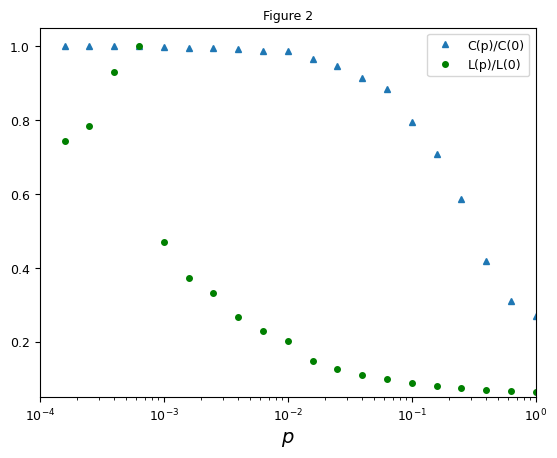

In [6]:
# Plot figure 2
plt.figure()
plt.xscale('log')
plt.title('Figure 2')
plt.xlim(.0001, 1)
plt.ylim(.05, 1.05)
plt.xlabel('$p$', fontsize=14)
plt.plot(p_list, C_list, '^')
plt.plot(p_list, L_list, 'go')
plt.legend(['C(p)/C(0)', 'L(p)/L(0)'])
plt.show()

#### Figure 3 (Trends of $r_{half}$ and $T(p, r=1)$)

In [7]:
#Functions to  collect T(p) and r_half statistics
def total_infection_time(adj_mat, r=1):
    N = adj_mat.shape[0]
    population = np.zeros(adj_mat.shape[0])  # 0 for not infected, 1 for just infected, 2 for infected immunes or dead
    population[0] = 1 # initially infect a single person
    for t in range(N):
        if np.all(population != 0):
            return t
        pop_next = population.copy()
        for v in range(N):
            if population[v] == 1:
                vth_row = adj_mat[v]
                nbhood_v = list(np.where(vth_row == 1)[0])
                for neighbor in nbhood_v:
                    if population[neighbor] == 0 and random.random() < r:
                        pop_next[neighbor] = 1
                pop_next[v] = 2
        population = pop_next
    return -1

def calc_r_half(adj_mat):
    r_vals = np.linspace(0.15, 0.35, 5)
    for r in r_vals:
        N = adj_mat.shape[0]
        population = np.zeros(adj_mat.shape[0]) # 0 for not infected, 1 for just infected, 2 for infected immunes or dead
        population[0] = 1 # initially infect a single person
        for t in range(N):
            ratio = len(np.where(population != 0)[0])/len(population)
            if ratio > 0.5:
                return r
            pop_next = population.copy()
            for v in range(N):
                if population[v] == 1:
                    vth_row = adj_mat[v]
                    nbhood_v = list(np.where(vth_row == 1)[0])
                    for neighbor in nbhood_v:
                        if population[neighbor] == 0 and random.random() < r:
                            pop_next[neighbor] = 1
                    pop_next[v] = 2
            population = pop_next
    return -1

In [8]:
#Generate the graphs in Figure 3 of the paper
#Generate 20 graphs and run tests (This process may require a lot of time and memory)
N_default = 1000
k_default = 10
G_0, adj_mat_0 = get_graph(N=N_default, k=k_default, p=0)
C_0 = avg_coefficient(G=G_0, adj_mat=adj_mat_0)
L_0 = averageChainLength(G=G_0, adj_mat=adj_mat_0)
T_0 = total_infection_time(adj_mat_0)
#if T_0 == -1:
#    print('Impossible to infect total population')

L_list = []
p_list = []
T_list = []
r_half_list = []
graph_list = []


for i, e in enumerate(range(38, -1, -2)):
    p = 1/math.pow(10, e/10)
    p_list.append(p)

    G, adj_mat = get_graph(N=N_default, k=k_default, p=p)
    L_p = averageChainLength(G=G, adj_mat=adj_mat)
    L_list.append(L_p/L_0)
    r_half = calc_r_half(adj_mat)
    r_half_list.append(r_half)
    T_p = total_infection_time(adj_mat)
    T_list.append(T_p/T_0)
    
    print("Iteration {}, p: {:.2e},   L(p)/L(0): {:.2e}, T(p)/T(0): {:.2e}, r_half={:.2e}".format(i, p, L_list[-1], T_list[-1], r_half_list[-1]) )

Iteration 0, p: 1.58e-04,   L(p)/L(0): 1.00e+00, T(p)/T(0): 1.00e+00, r_half=3.50e-01
Iteration 1, p: 2.51e-04,   L(p)/L(0): 7.08e-01, T(p)/T(0): 5.70e-01, r_half=-1.00e+00
Iteration 2, p: 3.98e-04,   L(p)/L(0): 6.19e-01, T(p)/T(0): 5.00e-01, r_half=-1.00e+00
Iteration 3, p: 6.31e-04,   L(p)/L(0): 6.82e-01, T(p)/T(0): 6.70e-01, r_half=-1.00e+00
Iteration 4, p: 1.00e-03,   L(p)/L(0): 5.67e-01, T(p)/T(0): 6.50e-01, r_half=3.00e-01
Iteration 5, p: 1.58e-03,   L(p)/L(0): 4.34e-01, T(p)/T(0): 4.50e-01, r_half=3.00e-01
Iteration 6, p: 2.51e-03,   L(p)/L(0): 3.68e-01, T(p)/T(0): 4.00e-01, r_half=3.50e-01
Iteration 7, p: 3.98e-03,   L(p)/L(0): 2.19e-01, T(p)/T(0): 2.30e-01, r_half=3.00e-01
Iteration 8, p: 6.31e-03,   L(p)/L(0): 2.14e-01, T(p)/T(0): 1.60e-01, r_half=3.00e-01
Iteration 9, p: 1.00e-02,   L(p)/L(0): 1.69e-01, T(p)/T(0): 1.50e-01, r_half=3.00e-01
Iteration 10, p: 1.58e-02,   L(p)/L(0): 1.42e-01, T(p)/T(0): 1.30e-01, r_half=3.00e-01
Iteration 11, p: 2.51e-02,   L(p)/L(0): 1.32e-01, 

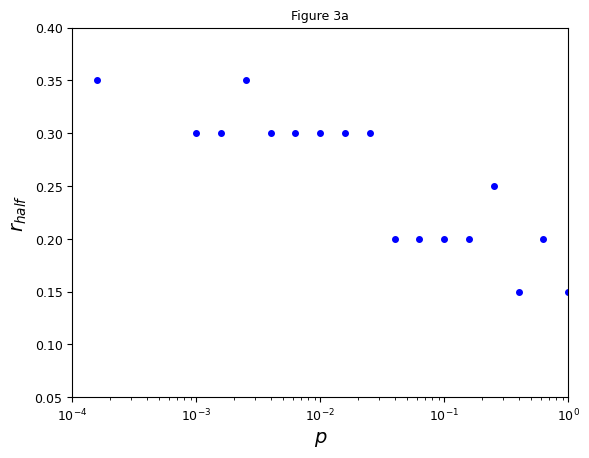

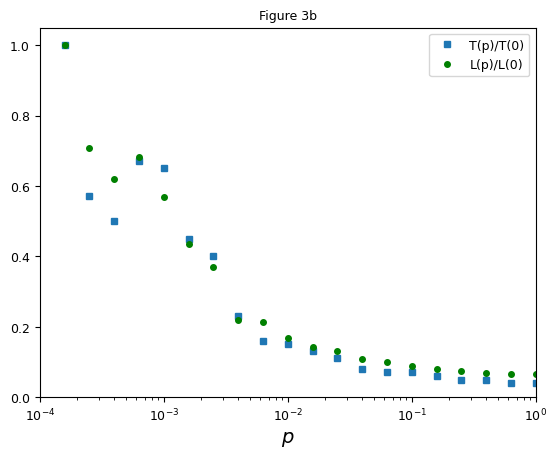

In [9]:
#Plot figure 3
plt.figure()
plt.xscale('log')
plt.title('Figure 3a')
plt.xlim(.0001, 1)
plt.ylim(.05, 0.40)
plt.xlabel('$p$', fontsize=14)
plt.ylabel(r'$r_{half}$', fontsize=14)
plt.plot(p_list, r_half_list, 'bo')

plt.figure()
plt.xscale('log')
plt.title('Figure 3b')
plt.xlim(.0001, 1)
plt.ylim(0, 1.05)
plt.xlabel('$p$', fontsize=14)
plt.plot(p_list, T_list, 's')
plt.plot(p_list, L_list, 'go')
plt.legend(['T(p)/T(0)', 'L(p)/L(0)'])

In conclusion, small-world phenomenon in slighlty randomly connected networks are confirmed. For some values of p, we are able to obtain high local connectivity (cliqueness) measured by $C(p)>C_{random}$ and low characteristic path length $L(p)\sim L_{random}$ simultaneously. These values imply the existence of a small-world phenomenon in the network.      

#### References

[1] Watts, D., Strogatz, S. Collective dynamics of ‘small-world’ networks. Nature 393, 440–442 (1998). https://doi.org/10.1038/30918

[2] B. Maier, Smallworld. GitHub, 2021. [Online]. Available: https://github.com/benmaier/smallworld
